# Beer Reviews Analysis and Recommendation

Data: 1.5M beer reviews from beer advocate. (https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz)

In [1]:
%matplotlib inline

### Import packages Numpy, Scikit Learn and Pandas

In [2]:
import numpy as np
import sklearn
import pandas as pd

Read in the "csv" file with reviews into a pandas "data frame". Pandas has this nice reader that can read a bunch of file formats and store the data in a "data frame"

In [3]:
beerData = pd.read_csv('/Users/phani/Downloads/beer_reviews/beer_reviews.csv', delimiter=",", encoding='utf-8')
# download the revievs csv form the link above. Alternatively, use 'urlopen' and rebuild this command 
#to read the csv file after unzipping the response 

In [4]:
for i in range(len(beerData.columns)):
    print("Column",i, ": ", beerData.columns[i])

print ("*************************")
print("Columns with Null Values")
for columnName in beerData.columns:
    nulls = len(beerData.loc[pd.isnull(beerData[columnName])])
    if nulls > 0 :
       print ("Column Name: ", columnName, " Null Values: ", nulls)

Column 0 :  brewery_id
Column 1 :  brewery_name
Column 2 :  review_time
Column 3 :  review_overall
Column 4 :  review_aroma
Column 5 :  review_appearance
Column 6 :  review_profilename
Column 7 :  beer_style
Column 8 :  review_palate
Column 9 :  review_taste
Column 10 :  beer_name
Column 11 :  beer_abv
Column 12 :  beer_beerid
*************************
Columns with Null Values
Column Name:  brewery_name  Null Values:  15
Column Name:  review_profilename  Null Values:  348
Column Name:  beer_abv  Null Values:  67785


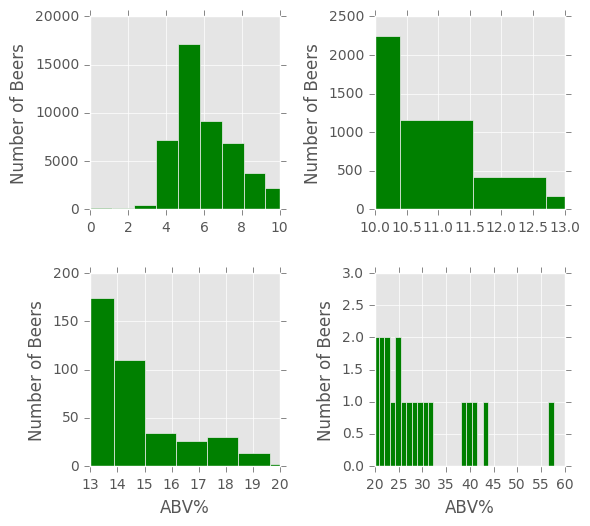

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes
from matplotlib import style
style.use('ggplot')

beerDataSortedABVs = beerData.sort_values(by="beer_abv", ascending=False).drop_duplicates("beer_beerid")
beerABVs = beerDataSortedABVs['beer_abv'].dropna()
bins = 50
plt.figure(figsize=(6,10))
plt.subplot(4,2,1)
plt.hist(beerABVs, bins, color='green')
plt.axis([0, 10, 0, 20000])
plt.ylabel("Number of Beers")
plt.subplot(4,2,2)
plt.hist(beerABVs, bins, color='green')
plt.axis([10, 13, 0, 2500])
plt.ylabel("Number of Beers")
plt.subplot(4,2,3)
plt.hist(beerABVs, bins, color='green')
plt.axis([13, 20, 0, 200])
plt.xlabel("ABV%")
plt.ylabel("Number of Beers")
plt.subplot(4,2,4)
plt.hist(beerABVs, bins, color='green')
plt.axis([20, 60, 0, 3])
plt.xlabel("ABV%")
plt.ylabel("Number of Beers")
plt.tight_layout(h_pad=1.0)



### Which brewery produces the strongest beers by ABV% ?

The data in the csv file has some undefined ("NaN") values for abv%. More than one users have rated the beers (duplicate abv% values). For sorting and ranking, these things don't matter. 
- Rank the beers based on the ABV%
- sort the data in "beer_abv" column in descending order
- pick the brewery that produces beer with highest abv%.

### Details of the beer with highest abv%

In [6]:
beerKey = beerDataSortedABVs["beer_abv"].keys()[0]
print ("Brewery Name: ", beerDataSortedABVs.loc[beerKey].brewery_name)
print ("Beer Name: ", beerDataSortedABVs.loc[beerKey].beer_name)
print ("Beer ABV%: ", beerDataSortedABVs.loc[beerKey].beer_abv)
print ("Beer ID: ", beerDataSortedABVs.loc[beerKey].beer_beerid)
print ("List of 5 beers with high ABV%")
topFive = beerDataSortedABVs[['brewery_name','beer_name', 'beer_abv','beer_beerid']][0:5]
topFive

Brewery Name:  Schorschbräu
Beer Name:  Schorschbräu Schorschbock 57%
Beer ABV%:  57.7
Beer ID:  73368
List of 5 beers with high ABV%


,brewery_name,beer_name,beer_abv,beer_beerid
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.70,73368
12939,Schorschbräu,Schorschbräu Schorschbock 43%,43.00,57856
746385,BrewDog,Sink The Bismarck!,41.00,57015
12941,Schorschbräu,Schorschbräu Schorschbock 40%,39.44,55712
996153,De Struise Brouwers,Black Damnation VI - Messy,39.00,70633


### List all the beers produced by the brewery that produces beer with highest abv%

In [7]:
breweryName = topFive.head(1).brewery_name.tolist()[0]
allBrews = beerDataSortedABVs[beerDataSortedABVs.brewery_name == breweryName].set_index(['brewery_name','beer_name'])
allBrews.drop(['brewery_id', 'review_time','review_profilename','review_overall',
              'review_palate','review_appearance','review_taste','review_aroma'], axis=1)

beer_style  beer_abv  \
brewery_name beer_name                                                      
Schorschbräu Schorschbräu Schorschbock 57%              Eisbock     57.70   
             Schorschbräu Schorschbock 43%              Eisbock     43.00   
             Schorschbräu Schorschbock 40%              Eisbock     39.44   
             Schorschbräu Schorschbock 31%              Eisbock     30.86   
             Schorsch Weizen 16%                     Weizenbock     16.00   
             Schorschbock                            Doppelbock     16.00   
             Schorschbräu Donner Weizen              Weizenbock     13.00   
             Schorschbräu Donner Bock                Doppelbock     13.00   
             Schorschbock Ice 13                        Eisbock     13.00   
             Schorschbräu Dunkles           Munich Dunkel Lager      4.90   

                                            beer_beerid  
brewery_name beer_name                                   
Schorschbräu Schorschbräu Schorschbock 57%        73368  
             Schorschbräu Schorschbock 43%        57856  
             Schorschbräu Schorschbock 40%        55712  
             Schorschbräu Schorschbock 31%        51466  
             Schorsch Weizen 16%                  71004  
             Schorschbock                         47421  
             Schorschbräu Donner Weizen           20169  
             Schorschbräu Donner Bock             15578  
             Schorschbock Ice 13                  73357  
             Schorschbräu Dunkles                 32973

## Recommendation

### Recommend beers based on the data - General recommendation

A simple ordering of data based on review_overall should give us a list with beers and their corresponding ranking in the list. However, the review_overall values for the beers are scattered and all the beers are not rated by all the users. 
Hence, we calculate the means of review_overall values for a given beer and assign that value as the overall rating for that beer. Then we rank the beers based on review_overall and then pick the top few beers as recommendations based on this data.

#### Data Cleaning 
Number of reviews are not same for all beers. So, we will calculate the sample mean from the number of reviews we gathered for a beer to assign one overall_review for each beer. However, some beers have only one review where as others have more than one reviews. Hence, we need to clean up the data to include only those beers where we can calculate the mean within a certain margin of error. 

#### Choosing Sample Means: 
The statistics way to chose the threshold number of reviews (min number of samples) is to compute the minimum number of required reviews for a beer to predict the mean with 95% confidence interval. 

We use this formula: ($\frac{\sigma^2 * Z^2}{m^2}$), where $\sigma$ is the standard deviation of the sample, Z-score for a confidence interval of 95% is 1.96 and m is the allowed margin of error. 

In [8]:
# define a new dataframe with four attributes
samplesDF = beerData[["beer_beerid","beer_name","review_overall", "review_profilename"]]

# drop duplicate reviews for the same beer
samplesDF = samplesDF.drop_duplicates(["beer_beerid","review_profilename"])

# set indices for determining levels
samplesDF = samplesDF.set_index(["beer_beerid","beer_name"])

# Calculate nSamples, sampleMeans, sampleStdDev

nSamples = samplesDF.groupby(level=0).count().to_dict()
sampleMeans = samplesDF.groupby(level=0).mean().to_dict()
sampleStdDev = samplesDF.groupby(level=0).std()

# Define Margin of Error and Z-score for 95% confidence interval
mError = 0.1
zScore = 1.96

#### 1. filter out sampleMeans with less number of reviews than minimum required to achieve 95% confidence interval 
#### 2. sort sampleMeans and rank beer_ids from the sorted sampleMeans
#### 3. reject samples with std dev = 0.0

In [9]:
sampleMeansTemp = {}
for key in nSamples.keys(): 
    if key == "review_overall": # we are only interested in overall_review
        for beerID in nSamples[key].keys(): # get the values - beer_beerid and overall review
            if sampleStdDev[key][beerID] > 0:
                nSamplesRequired = (sampleStdDev[key][beerID] * zScore/mError)**2
            if nSamples[key][beerID] > nSamplesRequired:
                sampleMeansTemp[beerID] =  sampleMeans[key][beerID]

# redefine sampleMeans by sorted overall_reviews 
sampleMeans = sorted(sampleMeansTemp.items(), key=lambda x: x[1] , reverse=True)

1. Filter out the beerIDs that are not included in sampleMeans list
2. make a new dataframe 

#### Note: appending rows to make a new data frame takes a lot of time. 
3. So take the original data frame and drop the rows by comparing beerIDs

In [10]:
reviewBeerIDs = [beerKey[0] for beerKey in sampleMeans]
# drop the duplicate beerIDs 
newBeerDF = beerData.drop_duplicates(["beer_beerid"])
beerIDsAll = newBeerDF.beer_beerid.tolist()

# list the iDs that we need to discard
discardBeerIDs = [beerID for beerID in beerIDsAll if beerID not in reviewBeerIDs]
newBeerDF = newBeerDF.set_index(["beer_beerid"])
newBeerDF = newBeerDF.drop(discardBeerIDs)

#drop other labels and leave only few for visualization
newBeerDF = newBeerDF.drop(['brewery_id','review_time', 'review_overall','review_aroma','review_taste',
                    'review_palate','review_profilename','beer_abv','review_appearance'], axis=1)

In [11]:
# Create a column review_overall with values from sampleMeans
review_overall = []
for beerIndex in newBeerDF.index.tolist():
    for keyIndex in range(len(sampleMeans)):
        if sampleMeans[keyIndex][0] == beerIndex:
            review_overall.append(sampleMeans[keyIndex][1])

# add the column review_overall values from sampleMeans list
newBeerDF['review_overall'] = review_overall

### Print the top ten beers in the list - General Recommendations

In [12]:
# sort the dataframe by overall reviews and print the top ten beers in the list
newBeerDF = newBeerDF.sort_values(by='review_overall', ascending=False)
newBeerDF.head(10)

,brewery_name,beer_style,beer_name,review_overall
beer_beerid,,,,
63649,Peg's Cantina & Brewpub / Cycle Brewing,American Double / Imperial Stout,Rare D.O.S.,4.848485
44910,De Struise Brouwers,Lambic - Unblended,Dirty Horse,4.820513
8626,Southampton Publick House,Berliner Weissbier,Southampton Berliner Weisse,4.768293
68548,Brouwerij Drie Fonteinen,Gueuze,Armand'4 Oude Geuze Lente (Spring),4.730769
70356,Brouwerij Drie Fonteinen,Gueuze,Armand'4 Oude Geuze Zomer (Summer),4.644444
56082,Kern River Brewing Company,American Double / Imperial IPA,Citra DIPA,4.628049
36316,Brasserie Cantillon,Lambic - Fruit,Cantillon Blåbær Lambik,4.625806
41928,Russian River Brewing Company,American Wild Ale,Deviation - Bottleworks 9th Anniversary,4.620536
16814,The Alchemist,American Double / Imperial IPA,Heady Topper,4.618510


## Feature importance

### Find out which features are important in determining the overall quality of the beer

In the reviews data set, we have four features listed for each beer: Appearance (or body), Aroma, Palate and Taste

Here we will try to correlate the overall rating for a given beer with each of the four features and then decide which of the above four features is the most important in determining the overall quality of the beer.

Since there are many users(reviewers) for each beer and the ratings are spread within a certain range of values, we will use the Samplemeans of the ratings for each beer as a representative value to develop correlation between features and overall rating. 

We can use two approaches: 
1. Compare the standardized $R^2$ values from the four features and rank them
2. Starting with a model with n-1 features, compare the $\Delta$ in $R^2$ when the left out feature is added and then chose the feature that results in the greatest $\Delta$

#### Data Cleaning 
We will use the same procedure for cleaning data and chosing sample means for building data and features. 

In [13]:
# Features and Data Matrix
# Create a new dataframe with the relevant features and other columns
featureDF = beerData[["beer_beerid", "review_profilename",'review_appearance','review_aroma', 
                      'review_palate','review_taste','review_overall']]
featureDF = featureDF.drop_duplicates(["beer_beerid","review_profilename"])
featureDF = featureDF.set_index("beer_beerid")

# discard the beers that didn't meet our screening criterion of 95% confidence level
# discardBeerIDs are taken from above
featureDF = featureDF.drop(discardBeerIDs)
featureDF = featureDF.reset_index()

# Make the list of all beers that pass the screenign criterion.
beerIDList = sorted(featureDF.beer_beerid.unique())

# Reindex the dataframe for extracting features.
featureDF = featureDF.set_index(["beer_beerid","review_profilename"])

#Debug Info:
    #print(len(beerIDList),len(profileList))

In [14]:
# Means and Standard deviation
featuresDict = featureDF.groupby(level=0).mean().to_dict()

#Appearance
appearanceSampleMeans = featuresDict['review_appearance']
#Aroma
aromaSampleMeans = featuresDict['review_aroma']
#Palate
palateSampleMeans = featuresDict['review_palate']
#Taste
tasteSampleMeans = featuresDict['review_taste']
#Overall review for Data Matrix
reviewSampleMeans = featuresDict['review_overall']

# Construct a numpy matrix with features Sample Means
featureMatrix = np.zeros(len(beerIDList*5)).reshape(len(beerIDList),5)
featuresMeansDicts = [appearanceSampleMeans,aromaSampleMeans,
                      palateSampleMeans,tasteSampleMeans]

# Populate the first element of the feature matrix with beerID
for beerIndex in range(len(beerIDList)):
    featureMatrix[beerIndex][0] = beerIDList[beerIndex]
    
featureIndex = 1 # feature index in feature Matrix
for featureDict in featuresMeansDicts:
    for beerIndex in range(len(beerIDList)):
        for key in featureDict.keys():
            if key == beerIDList[beerIndex]:
                featureMatrix[beerIndex][featureIndex] = featureDict[key]
    featureIndex += 1

# Construct the dataMatrix with Sample Means of overall review
dataMatrix = np.zeros(len(beerIDList*2)).reshape(len(beerIDList),2)

# Populate the first element of the Data matrix with beerID
# Second element with the overall review
#for beerIndex in range(len(beerIDList)):
#    dataMatrix[beerIndex][0] = beerIDList[beerIndex]

for beerIndex in range(len(beerIDList)):
    dataMatrix[beerIndex][0] = beerIDList[beerIndex]
    for key in reviewSampleMeans.keys():
        if key == beerIDList[beerIndex]:
            dataMatrix[beerIndex][1] = reviewSampleMeans[key]     

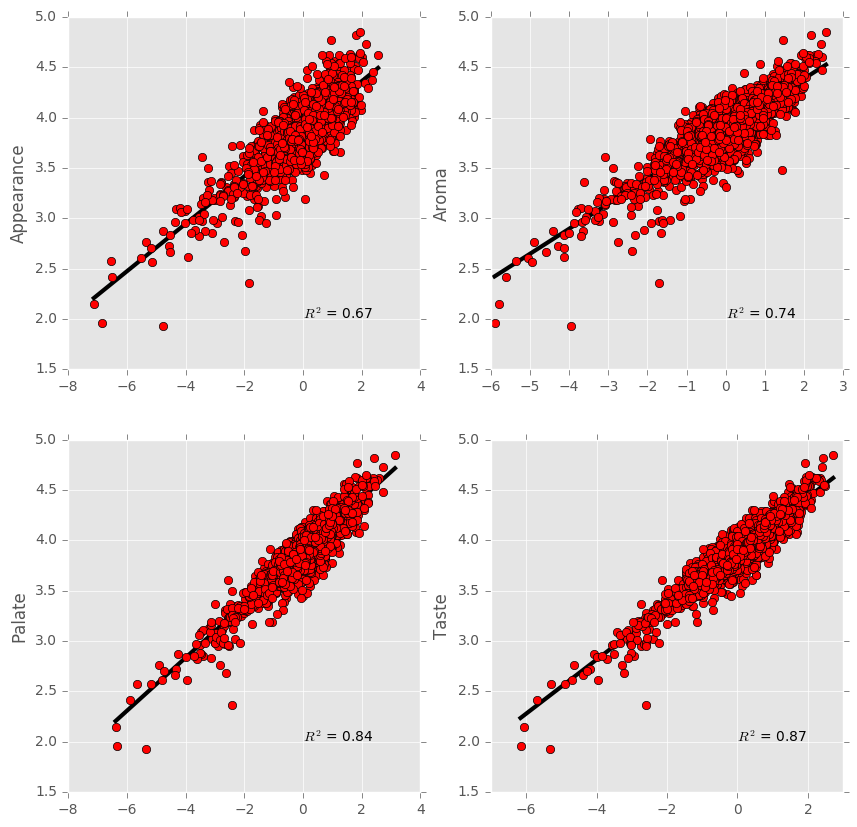

In [42]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(10,10))

X = np.array([featureMatrix[i][1:] for i in range(featureMatrix.shape[0])])
# Standardize the feature matrix: subtract mean and make it unit variance. $X = \frac{X-\mu}{\sigma}$
X = StandardScaler().fit_transform(X) 
y = np.array([dataMatrix[i][1] for i in range(dataMatrix.shape[0])])

# Transpose to index individual columns
X = X.T

for index in range(4):
    X_feature = X[index]
    X_feature = X_feature[:,np.newaxis]
    regressor = LinearRegression()
    regressor.fit(X_feature, y)
    score = regressor.score(X_feature,y)
    xMin = X_feature.min() * regressor.coef_[0] + regressor.intercept_
    xMax = X_feature.max() * regressor.coef_[0] + regressor.intercept_
    
    ax = fig.add_subplot(2,2,index+1)
    ax.plot([X_feature.min(), X_feature.max()], [xMin, xMax],linewidth=3.0, color='k')
    ax.plot(X[index], y, 'ro')

    if index == 0:
        ax.set_ylabel('Appearance')
        ax.text(0,2,'$R^2$ = %.2f'%score)
    elif index == 1:
        ax.set_ylabel('Aroma')
        ax.text(0,2,'$R^2$ = %.2f'%score)
    elif index == 2:
        ax.set_ylabel('Palate')
        ax.text(0,2,'$R^2$ = %.2f'%score)
    else:
        ax.set_ylabel('Taste')
        ax.text(0,2,'$R^2$ = %.2f'%score)


In [30]:
features = {0:"Appearance",1:"Aroma",2:"Palate",3:"Taste"}
deltaR2 = []
for index in range(4):
    X_feature = np.delete(X.T,index,axis=1)
    regressor = LinearRegression()
    regressor.fit(X_feature, y)
    scoreOne = regressor.score(X_feature,y)
    regressor.fit(X.T, y)
    scoreTwo = regressor.score(X.T,y)
    deltaR2.append(scoreTwo - scoreOne)
    print("Change in $R^2$ value upon including ", features[index]," = ", "%.3f"%deltaR2[index])
    
    

Change in $R^2$ value upon including  Appearance  =  0.000
Change in $R^2$ value upon including  Aroma  =  0.018
Change in $R^2$ value upon including  Palate  =  0.000
Change in $R^2$ value upon including  Taste  =  0.049


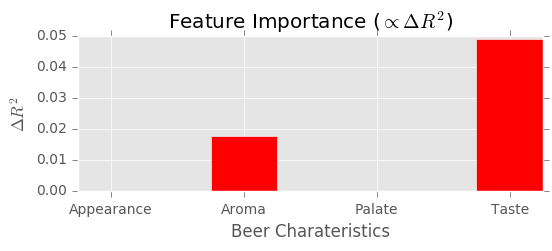

In [68]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(111)
width = 0.5
ax.bar(list(features.keys()), deltaR2, width, color='r')
ax.set_xticks([i+width*0.5 for i in list(features.keys())])
ax.set_xticklabels(('Appearance', 'Aroma', 'Palate', 'Taste'))
ax.set_xlabel("Beer Charateristics")
ax.set_ylabel("$\Delta R^2$")
ax.set_title("Feature Importance ($ \propto \Delta R^2$)")